In [32]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [33]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [34]:
base_dir = r'D:\Anaconda\Deep_learning\skin-cancer-malignant-vs-benign'
train_dir = os.path.join(base_dir, 'train')

In [35]:
train_benign = os.path.join(train_dir, 'benign')
train_malignant = os.path.join(train_dir, 'malignant')

In [36]:
num_benign_tr = len(os.listdir(train_benign))
num_malignant_tr = len(os.listdir(train_malignant))

In [37]:
total_train = num_benign_tr + num_malignant_tr

In [38]:
BATCH_SIZE = 32
IMG_SHAPE = 150 # square image

In [39]:
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

In [40]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE, IMG_SHAPE),
                                                           class_mode='binary')

Found 2637 images belonging to 2 classes.


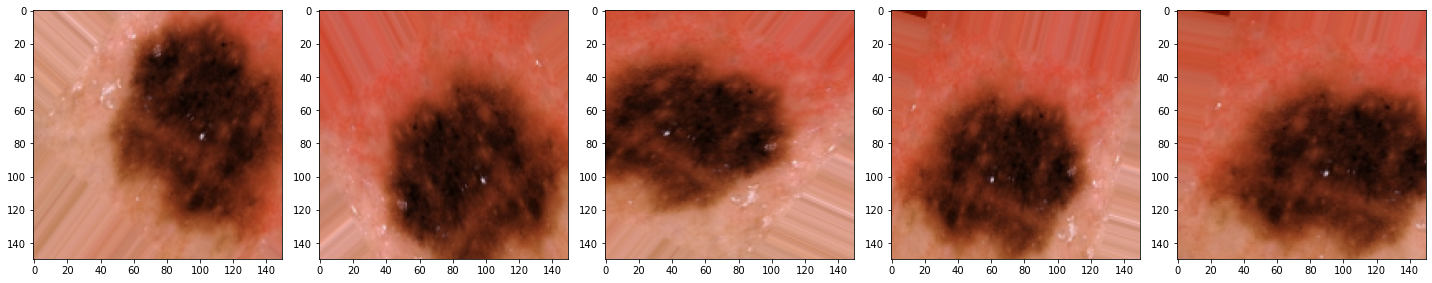

In [41]:
images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(images)

In [42]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)), # RGB
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Dropout(0.5), # 1/2 of neurons will be turned off randomly
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    
    tf.keras.layers.Dense(2, activation='softmax') #[0, 1] or [1, 0]
    
    ])

In [43]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [45]:
EPOCHS = 32

In [46]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    )


Epoch 1/32
83/83 [==============================] - 175s 2s/step - loss: 0.6392 - acc: 0.6246
Epoch 2/32
83/83 [==============================] - 170s 2s/step - loss: 0.5093 - acc: 0.7338
Epoch 3/32
83/83 [==============================] - 169s 2s/step - loss: 0.4582 - acc: 0.7736
Epoch 4/32
83/83 [==============================] - 169s 2s/step - loss: 0.4601 - acc: 0.7683
Epoch 5/32
83/83 [==============================] - 167s 2s/step - loss: 0.4492 - acc: 0.7732
Epoch 6/32
83/83 [==============================] - 169s 2s/step - loss: 0.4118 - acc: 0.7911
Epoch 7/32
83/83 [==============================] - 168s 2s/step - loss: 0.4222 - acc: 0.7808
Epoch 8/32
83/83 [==============================] - 169s 2s/step - loss: 0.4309 - acc: 0.7888
Epoch 9/32
83/83 [==============================] - 169s 2s/step - loss: 0.4251 - acc: 0.7861
Epoch 10/32
83/83 [==============================] - 166s 2s/step - loss: 0.4144 - acc: 0.7869
Epoch 11/32
83/83 [==============================] - 166s 2

In [47]:
model.save("benign_vs_malignant.h5")